# Team: Mohit Bansal

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import string

# Data Cleaning and splitting method

In [225]:
from sklearn.model_selection import train_test_split

# takes in raw data as given performs feature engineering to 
# add useful columns and clean up existing columns. Does not
# change the original data
def clean_and_split(students, size):
    students_cleaned = students.copy(deep=True)
    constants = [] # keeping track of constants added for validation data
    # splitting course_id to get course and time
    course = []
    time = []
    for course_id in students_cleaned['course_id']:
        info = course_id.split('/')
        course.append(info[1])
        time.append(info[2])
    students_cleaned['course'] = course
    students_cleaned['time'] = time
                               
    # replacing NaN values with 'nan' strings for categorical data
    students_cleaned['final_cc_cname_DI'] = students['final_cc_cname_DI'].fillna('nan')
    students_cleaned['LoE_DI'] = students_cleaned['LoE_DI'].fillna('nan')
    students_cleaned['gender'] = students_cleaned['gender'].fillna('nan')
    
    # one hot encoding for categorical variables 
    students_cleaned = pd.get_dummies(students_cleaned, columns=['final_cc_cname_DI', 'LoE_DI', 'gender', 'course', 'time'])
    features = list(students_cleaned.columns)
    features.remove('course_id')
    features.remove('userid_DI')
    if 'certified' in features:
        features.remove('certified')
    features.remove('start_time_DI')
    features.remove('last_event_DI')
    
    # splitting between train and validation sets
    train_data, validation_data = train_test_split(students_cleaned, test_size=size)
    train_data = train_data.copy(deep=True)
    validation_data = validation_data.copy(deep=True)
    
    # converting grade strings to float and replacing NaN values with mean grade
    train_data['grade'] = pd.to_numeric(train_data['grade'], errors='coerce')
    validation_data['grade'] = pd.to_numeric(validation_data['grade'], errors='coerce')
    mean_grade = train_data['grade'].mean() 
    mean_grade = round(mean_grade,2) # round off to 2 decimal places
    train_data['grade'] = train_data['grade'].fillna(mean_grade)
    validation_data['grade'] = validation_data['grade'].fillna(mean_grade)
    
    # replacing NaN values with mean for other numerical features
    mean_yob = round(train_data['YoB'].mean())
    train_data['YoB'] = train_data['YoB'].fillna(mean_yob)
    validation_data['YoB'] = validation_data['YoB'].fillna(mean_yob)
    mean_nevents = round(train_data['nevents'].mean())
    train_data['nevents'] = train_data['nevents'].fillna(mean_nevents)
    validation_data['nevents'] = validation_data['nevents'].fillna(mean_nevents)
    mean_ndays = round(train_data['ndays_act'].mean())
    train_data['ndays_act'] = train_data['ndays_act'].fillna(mean_ndays)
    validation_data['ndays_act'] = validation_data['ndays_act'].fillna(mean_ndays)
    mean_nplays = round(train_data['nplay_video'].mean())
    train_data['nplay_video'] = train_data['nplay_video'].fillna(mean_nplays)
    validation_data['nplay_video'] = validation_data['nplay_video'].fillna(mean_nplays)
    mean_chapters = round(train_data['nchapters'].mean())
    train_data['nchapters'] = train_data['nchapters'].fillna(mean_chapters)
    validation_data['nchapters'] = validation_data['nchapters'].fillna(mean_chapters)
    mean_forums = round(train_data['nforum_posts'].mean())
    train_data['nforum_posts'] = train_data['nforum_posts'].fillna(mean_forums)
    validation_data['nforum_posts'] = validation_data['nforum_posts'].fillna(mean_forums)
    
    # these are used to apply same tranformation to test features
    constants = []
    constants.append(mean_grade)
    constants.append(mean_yob)
    constants.append(mean_nevents)
    constants.append(mean_ndays)
    constants.append(mean_nplays)
    constants.append(mean_chapters)
    constants.append(mean_forums)
                
    return constants, features, train_data, validation_data

In [226]:
def clean_test(constants, students):
    students_cleaned = students.copy(deep=True)
    # splitting course_id to get course and time
    course = []
    time = []
    for course_id in students_cleaned['course_id']:
        info = course_id.split('/')
        course.append(info[1])
        time.append(info[2])
    students_cleaned['course'] = course
    students_cleaned['time'] = time
                               
    # replacing NaN values with 'nan' strings for categorical data
    students_cleaned['final_cc_cname_DI'] = students['final_cc_cname_DI'].fillna('nan')
    students_cleaned['LoE_DI'] = students_cleaned['LoE_DI'].fillna('nan')
    students_cleaned['gender'] = students_cleaned['gender'].fillna('nan')
    
    # one hot encoding for categorical variables 
    students_cleaned = pd.get_dummies(students_cleaned, columns=['final_cc_cname_DI', 'LoE_DI', 'gender', 'course', 'time'])
    
    # converting grade strings to float and replacing NaN values with mean grade
    students_cleaned['grade'] = pd.to_numeric(students_cleaned['grade'], errors='coerce')
    mean_grade = constants[0]
    students_cleaned['grade'] = students_cleaned['grade'].fillna(mean_grade)
    
    # replacing NaN values with mean for other numerical features
    mean_yob = constants[1]
    students_cleaned['YoB'] = students_cleaned['YoB'].fillna(mean_yob)
    mean_nevents = constants[2]
    students_cleaned['nevents'] = students_cleaned['nevents'].fillna(mean_nevents)
    mean_ndays = constants[3]
    students_cleaned['ndays_act'] = students_cleaned['ndays_act'].fillna(mean_ndays)
    mean_nplays = constants[4]
    students_cleaned['nplay_video'] = students_cleaned['nplay_video'].fillna(mean_nplays)
    mean_chapters = constants[5]
    students_cleaned['nchapters'] = students_cleaned['nchapters'].fillna(mean_chapters)
    mean_forums = constants[6]
    students_cleaned['nforum_posts'] = students_cleaned['nforum_posts'].fillna(mean_forums)
              
    return students_cleaned

# Training the models

In [227]:
students_data = pd.read_csv('edx_su2021_train.csv')
constants, features, train_data, validation_data = clean_and_split(students_data, 0.2)

In [228]:
validation_data['certified']

6530    0
5081    1
7046    0
5910    0
6141    1
       ..
2129    0
451     0
2397    1
3390    0
7102    1
Name: certified, Length: 1752, dtype: int64

## Majority Classifier

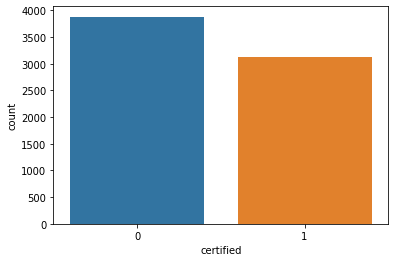

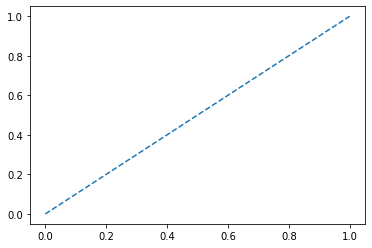

In [229]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
plt.figure()
sns.countplot(x='certified', data = train_data)
# it is clear that 0 is the majority class
majority_probs = np.zeros(len(validation_data))
majority_fpr, majority_tpr, _ = roc_curve(validation_data['certified'], majority_probs)
plt.figure()
plt.plot(majority_fpr, majority_tpr, linestyle='--', label='Majority classifier')

## Logistic Regression with L2 penalty

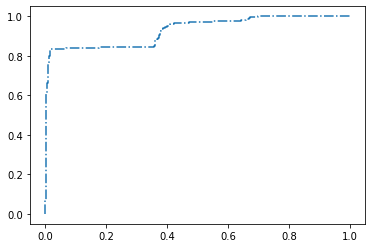

In [230]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=3000 ,solver='lbfgs', penalty='l2', C=0.0001)
logistic_model.fit(train_data[features], train_data['certified'])

logistic_probs = logistic_model.predict_proba(validation_data[features])
logistic_probs = logistic_probs[:, 1]

logistic_fpr, logistic_tpr, _ = roc_curve(validation_data['certified'], logistic_probs)
plt.figure()
plt.plot(logistic_fpr, logistic_tpr, linestyle='-.', label='Logistic Reg. classifier')

## Decision Tree

In [231]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
hyperparameters = {
    'min_samples_leaf': [1, 10, 50, 100, 200, 300],
    'max_depth': [1, 5, 10, 15, 20]
}
estimator = DecisionTreeClassifier()
search = GridSearchCV(estimator, hyperparameters, cv=6, return_train_score=True)
search.fit(train_data[features], train_data['certified'])
print(search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 1}


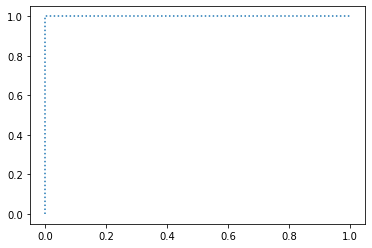

In [232]:
tree_model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1)
tree_model.fit(train_data[features], train_data['certified'])

tree_probs = tree_model.predict_proba(validation_data[features])
tree_probs = tree_probs[:,1]

tree_fpr, tree_tpr, _ = roc_curve(validation_data['certified'], tree_probs)
plt.figure()
plt.plot(tree_fpr, tree_tpr, linestyle=':', label='Decision Tree classifier')

# ROC curves of all 3 - Comparing the models

Text(0.5, 1.0, 'ROC curves')

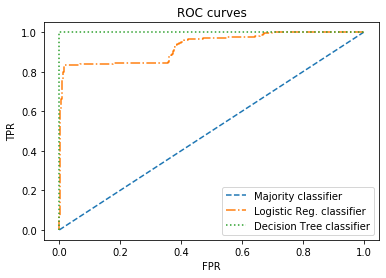

In [233]:
fig, ax = plt.subplots()
ax.set_title('A single plot')
ax.plot(majority_fpr, majority_tpr, linestyle='--', label='Majority classifier')
ax.plot(logistic_fpr, logistic_tpr, linestyle='-.', label='Logistic Reg. classifier')
ax.plot(tree_fpr, tree_tpr, linestyle=':', label='Decision Tree classifier')
ax.legend()
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.set_title("ROC curves")

## Brief Inference:
#### We have plotted the ROC curve which plots the True positive rate against the False positive rate for different threshold values. TPR is an indicator of how accurately the model predicts the positive class. The FPR on the other hand indicates how many times we wrongly predict positive. Based on the nature of these rates, we naturally want the FPR to be low and TPR to be high. According to this criterion, our decision tree classifier has the best model for all the thresholds. Another thing to consider is the Area under the curve. Higher area under an ROC curve generally implies a better model. This holds true since, the decision tree classifier has the highest area under the curve.
#### Through the ROC curves above we can see that we get the Decision Tree Classifier as the best model. Now, we use this model to predict the test labels

# Test predictions

In [234]:
# Uploading test data
students_test = pd.read_csv('edx_su2021_test.csv')
students_test = clean_test(constants, students_test)

In [235]:
predictions = tree_model.predict(students_test[features])
to_save = students_test[['userid_DI']].copy()
to_save.loc[:, 'certified'] = predictions
to_save.to_csv('submission.csv', index=False)

# Answers to Questions
### Discuss what features you used and whether you did some transformations on them. What features seemed important for your final model? 
#### I used the course_id feature to extract two columns for course code and time of year. I used the registered, viewed and explored features without any modification. I replaced NaN values with 'nan' strings for categorical data in LoE, final_cc_cname_DI, and gender. I used one hot encoding for 'final_cc_cname_DI', 'LoE_DI', 'gender', 'course',and 'time' variables. For pother numerical features (YoB, grade, nevent, ndays_act, nplay_video, nchapters, nforum_posts) I replaced the NaN values with mean of those columns in the training data.
#### The features of course and time of year seemed important for the final model because adding them reduced my validation error.

### Explain what did you do to improve your initial predictions. Did it help? 
#### To improve my initial predictions, I removed the features - start time and last event. I also added the course code and time of year features extracted from the course_id. This seemed to greatly help my predictions. I also used GridSearchCV to perform hyperparameter tuning for 'min_samples_leaf' and 'max_depth' hyperparameters of the decision tree classifier. This helped me in deciding the best values for these hyperparameters.

### Consider and discuss the ethical implications of using the model you trained. 
#### I can think of two ethical implications of using my model. First is the use of gender as feature which may lead to gender discrimination if used incorrectly. The second is the ethical implication of racial discrimination due to the presence of the 'final_cc_cname' feature. 

### Imagine you were hired to work as a data scientist for an online education platform (exciting, right?). They want to use your model to predict which students they should tailor their course material towards so they can maximize their profits. Their idea is to use the model to help predict which student groups (i.e. from specific countries or certain educational backgrounds) would make them the most money by getting the most participants to complete their paid certificate program. Are there any ethical considerations we should think about before acting on that plan?
#### Yes, we should consider the ethical considerations of end goal. If our end goal is 'making money', we are bound to discriminate between countries/ continents and even gender if it suits our goal. This is because gender and continents are used as features in the model. This can further widen any cultural or academic disparity between two socio-economic groups by impacting the access to education for those groups.

# Further Analysis (just for fun)

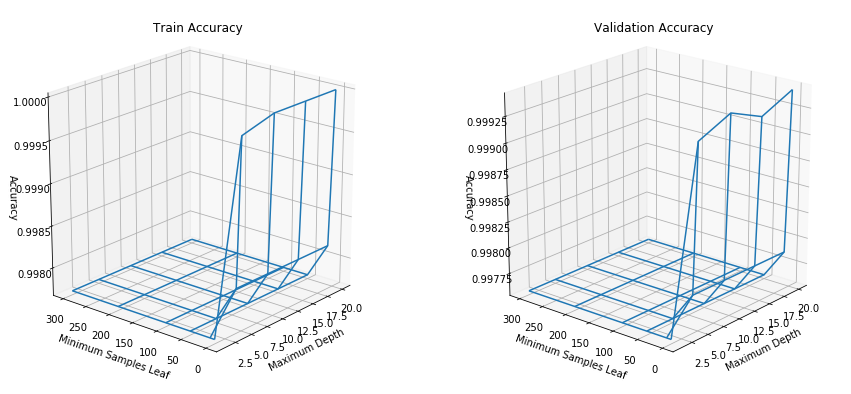

In [236]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import tree
def plot_scores(ax, title, search, hyperparameters, score_key):
    # Get results from GridSearch and turn scores into matrix
    cv_results = search.cv_results_
    scores = cv_results[score_key]
    scores = scores.reshape((len(hyperparameters['max_depth']), len(hyperparameters['min_samples_leaf'])))
    max_depths = cv_results['param_max_depth'].reshape(scores.shape).data.astype(int)
    min_samples_leafs = cv_results['param_min_samples_leaf'].reshape(scores.shape).data.astype(int)
    
    # Plot result
    ax.plot_wireframe(max_depths, min_samples_leafs, scores)
    ax.view_init(20, 220)
    ax.set_xlabel('Maximum Depth')
    ax.set_ylabel('Minimum Samples Leaf')
    ax.set_zlabel('Accuracy')
    ax.set_title(title)


fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
plot_scores(ax1, 'Train Accuracy', search, hyperparameters, 'mean_train_score')
plot_scores(ax2, 'Validation Accuracy', search, hyperparameters, 'mean_test_score')

In [237]:
import scipy.stats 

class RandomForest416: 
    """
    This class implements the common sklearn model interface (has a fit and predict function).
    
    A random forest is a collection of decision trees that are trained on random subsets of the 
    dataset. When predicting the value for an example, takes a majority vote from the trees.
    """
    
    def __init__(self, num_trees, max_depth=None):
        """
        Constructs a RandomForest416 that uses the given numbner of trees, each with a 
        max depth of max_depth.
        """
        self._trees = [
            DecisionTreeClassifier(max_depth=max_depth, random_state=1) 
            for i in range(num_trees)
        ]
        
    def fit(self, X, y):
        """
        Takes an input dataset X and a series of targets y and trains the RandomForest416.
        
        Each tree will be trained on a random sample of the data that samples the examples
        uniformly at random (with replacement). Each random dataset will have the same number
        of examples as the original dataset, but some examples may be missing or appear more 
        than once due to the random sampling with replacement.
        """    
        # TODO implement this method!
        num_examples = len(X)
        for i,model in enumerate(self._trees):
            rand_indices = np.random.randint(num_examples, size=num_examples)
            random_X = X.iloc[rand_indices]
            random_y = y.iloc[rand_indices]
            self._trees[i] = model.fit(random_X, random_y)
        
            
    def predict(self, X):
        """
        Takes an input dataset X and returns the predictions for each example in X.
        """
        # Builds up a 2d array with n rows and T columns
        # where n is the number of points to classify and T is the number of trees
        predictions = np.zeros((len(X), len(self._trees)))
        for i, tree in enumerate(self._trees):
            # Make predictions using the current tree
            preds = tree.predict(X)
            
            # Store those predictions in ith column of the 2d array
            predictions[:, i] = preds
            
        # For each row of predictions, find the most frequent label (axis=1 means across columns)
        return scipy.stats.mode(predictions, axis=1)[0]

In [238]:
rf = RandomForest416(2, max_depth=10)
rf.fit(train_data[features], train_data['certified'])
rf.predict(validation_data[features])

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]])

Depth 1
Depth 3
Depth 5
Depth 7
Depth 9
Depth 11
Depth 13
Depth 15
Depth 17
Depth 19
Depth 21
Depth 23
Depth 25


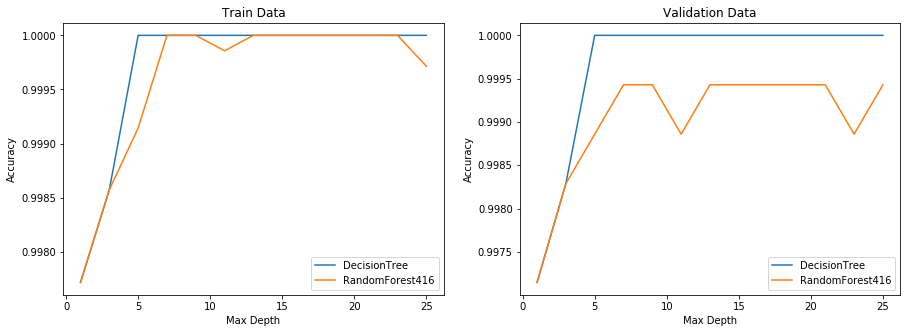

In [239]:
from sklearn.metrics import accuracy_score
depths = list(range(1, 26, 2))
dt_accuracies = []
rf_accuracies = []
target = 'certified'
for i in depths:
    print(f'Depth {i}')

    # Train and evaluate a Decision Tree Classifier with given max_depth
    tree = DecisionTreeClassifier(max_depth=i, min_samples_leaf=1)
    tree.fit(train_data[features], train_data[target])
    dt_accuracies.append((
        accuracy_score(tree.predict(train_data[features]), train_data[target]),
        accuracy_score(tree.predict(validation_data[features]), validation_data[target])
    ))
    
    # Train and evaluate our RandomForest classifier with given max_depth 
    rf = RandomForest416(15, max_depth=i)
    rf.fit(train_data[features], train_data[target])
    rf_accuracies.append((     
        accuracy_score(rf.predict(train_data[features]), train_data[target]),
        accuracy_score(rf.predict(validation_data[features]), validation_data[target])
    ))
    
# Then plot the scores
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot training accuracies
axs[0].plot(depths, [acc[0] for acc in dt_accuracies], label='DecisionTree')
axs[0].plot(depths, [acc[0] for acc in rf_accuracies], label='RandomForest416')

# Plot validation accuracies
axs[1].plot(depths, [acc[1] for acc in dt_accuracies], label='DecisionTree')
axs[1].plot(depths, [acc[1] for acc in rf_accuracies], label='RandomForest416')

# Customize plots
axs[0].set_title('Train Data')
axs[1].set_title('Validation Data')
for ax in axs:
    ax.legend()
    ax.set_xlabel('Max Depth')
    ax.set_ylabel('Accuracy')

['registered', 'viewed', 'explored', 'YoB', 'grade', 'nevents', 'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts', 'final_cc_cname_DI_Australia', 'final_cc_cname_DI_Bangladesh', 'final_cc_cname_DI_Brazil', 'final_cc_cname_DI_Canada', 'final_cc_cname_DI_China', 'final_cc_cname_DI_Colombia', 'final_cc_cname_DI_Egypt', 'final_cc_cname_DI_France', 'final_cc_cname_DI_Germany', 'final_cc_cname_DI_Greece', 'final_cc_cname_DI_India', 'final_cc_cname_DI_Indonesia', 'final_cc_cname_DI_Japan', 'final_cc_cname_DI_Mexico', 'final_cc_cname_DI_Morocco', 'final_cc_cname_DI_Nigeria', 'final_cc_cname_DI_Other Africa', 'final_cc_cname_DI_Other East Asia', 'final_cc_cname_DI_Other Europe', 'final_cc_cname_DI_Other Middle East/Central Asia', 'final_cc_cname_DI_Other North & Central Amer., Caribbean', 'final_cc_cname_DI_Other Oceania', 'final_cc_cname_DI_Other South America', 'final_cc_cname_DI_Other South Asia', 'final_cc_cname_DI_Pakistan', 'final_cc_cname_DI_Philippines', 'final_cc_cname_DI_Poland'